**Importing Dependecies**

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import joblib
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn import metrics

### Data Collection

In [36]:
# loading the dataset(calories) from a csv file to pandas dataframe 
calories_df = pd.read_csv("C:/Users/USER/Desktop/Datasets/calories.csv")
calories_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [37]:
# loading the dataset(exercise) from a csv file to pandas dataframe 
exercise_df = pd.read_csv("C:/Users/USER/Desktop/Datasets/exercise.csv")
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [38]:
# merging the two dataframes 
df = pd.concat([exercise_df, calories_df['Calories']], axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [39]:
# checking number rows and columns 
df.shape

(15000, 9)

In [40]:
# basic overview of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [41]:
# checking for missing values 
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### Exploratory Data Analysis

In [42]:
# summary statistics of the data 
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [43]:
sns.set()

Text(0.5, 1.0, 'Gender Distribution')

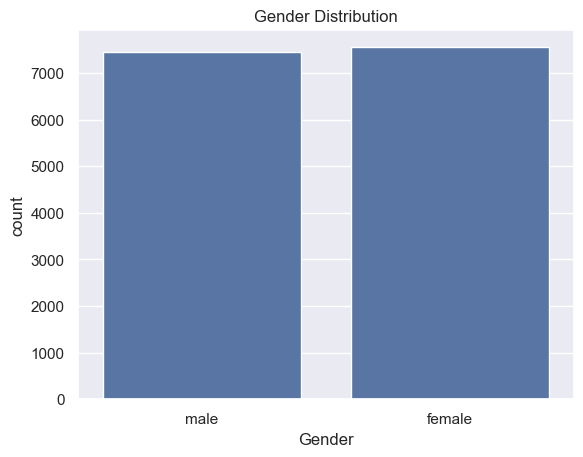

In [44]:
# Distribution of Gender
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")

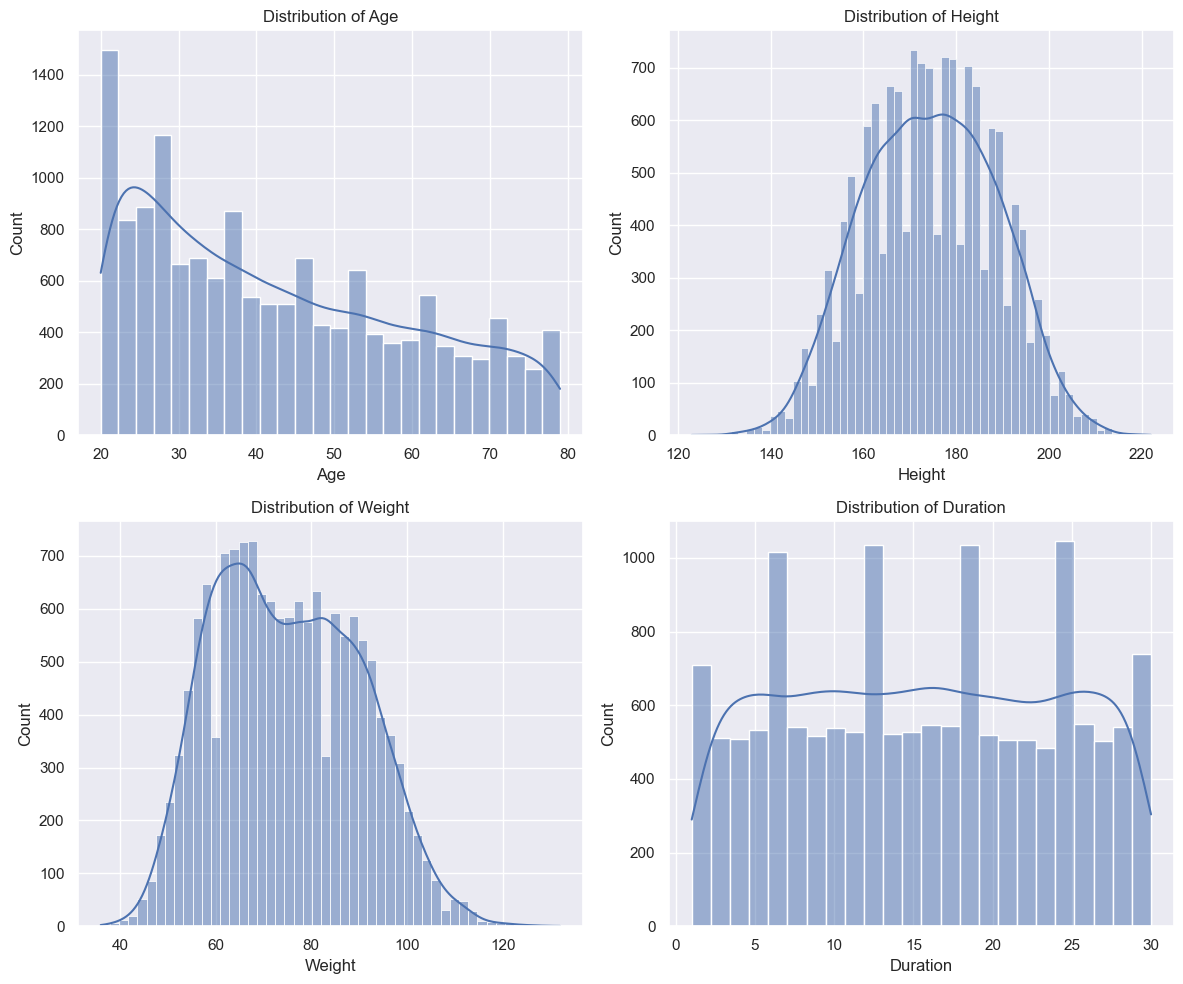

In [45]:
# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Distribution of Age
sns.histplot(x='Age', kde=True, data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

# Distribution of Height
sns.histplot(x='Height', kde=True, data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Height')

# Distribution of Weight
sns.histplot(x='Weight', kde=True, data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Weight')

# Distribution of Duration
sns.histplot(x='Duration', kde=True, data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Duration')

# Adjust layout
plt.tight_layout()
plt.show()

In [46]:
# correlation of the data 
correlation = df.corr(numeric_only=True)

<Axes: >

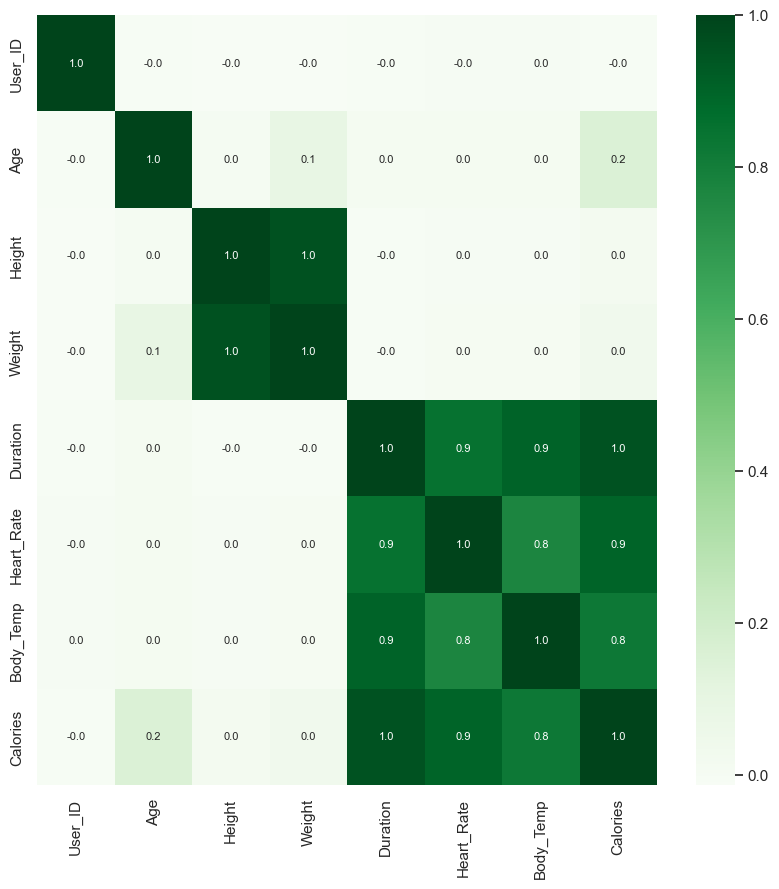

In [47]:
# Visualizing the ccorrelation with heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

### Data Preprocessing

**Dummy Variable**

In [48]:
# Create dummy variables for the Gender column
gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender', dtype=int)

#Add the dummies to the original DataFrame
df = pd.concat([df, gender_dummies], axis=1)

print(df)

        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  Gender_female  Gender_male
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8     231.0              0            1
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3      66.0              1            0
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7      26.0              0            1
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5      71.0              1            0
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8      35.0              1            0
...         ...     ...  ...     ...     ...       ...         ...        ...       ...            ...          ...
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4      45.0              1            0
14996  17212577  female   27   165.0    65.0       6.0        85.0      

**Seperating Features and Target**

In [50]:
X = df.drop(['User_ID', 'Gender', 'Gender_female', 'Calories'], axis=1)
Y = df['Calories']

In [51]:
print(X)

       Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Gender_male
0       68   190.0    94.0      29.0       105.0       40.8            1
1       20   166.0    60.0      14.0        94.0       40.3            0
2       69   179.0    79.0       5.0        88.0       38.7            1
3       34   179.0    71.0      13.0       100.0       40.5            0
4       27   154.0    58.0      10.0        81.0       39.8            0
...    ...     ...     ...       ...         ...        ...          ...
14995   20   193.0    86.0      11.0        92.0       40.4            0
14996   27   165.0    65.0       6.0        85.0       39.2            0
14997   43   159.0    58.0      16.0        90.0       40.1            0
14998   78   193.0    97.0       2.0        84.0       38.3            1
14999   63   173.0    79.0      18.0        92.0       40.5            1

[15000 rows x 7 columns]


In [52]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


**Seperating Training and Test dat**

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=13)

In [54]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12750, 7) (2250, 7)


### Model Training and Evaluation

**Model Training: XGBRegressor**

In [56]:
# loading the model
model = XGBRegressor()

In [57]:
# Training the model
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

**Evaluation**

In [60]:
# Prediction on test data 
X_test_prediction = model.predict(X_test)

mae = metrics.mean_absolute_error(X_test_prediction, Y_test)
rmse = metrics.root_mean_squared_error(X_test_prediction, Y_test)
r_squared = metrics.r2_score(X_test_prediction, Y_test)

print('Mean Absolute Error :', mae)
print('Root Mean Square Error :', rmse)
print('R Squared Error :', r_squared)

Mean Absolute Error : 1.4583615645037757
Root Mean Square Error : 2.061264325613679
R Squared Error : 0.9989001960549938


In [61]:
# Saving the model locally 
joblib.dump(model, 'calories_burnt_prediction_model')

['calories_burnt_prediction_model']